# Introduction

The aim of this project is to carryout an analysis on the imdb movie dataset in order to recommend the most profitable movie to produce for Sussex Budget Productions.

For this analysis, we would be carrying out the following steps listed below.
1. Data Cleaning
2. Data Splitting
3. Exploratory Data Analysis
4. Hypothesis

Our objective is to suggest the most profitable movie based on the result gotten from the analysis. 

In [99]:
# Firstly, we import the necessary libraries needed to carryout our operation
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [100]:
# To load  the dataset into  our jupyter notebook
imdb = pd.read_csv('movie_metadata.csv')

In [101]:
# To check to see the first 5 datasets showing the rows and columns
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [102]:
# To check to see the number of rows and columns in our data
imdb.shape

(5043, 28)

In [103]:
# To check for the statistical summary of the dataset
imdb.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [104]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [105]:
# To check for the number of NaN values in each column
imdb.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

# Data Cleaning

In  order to  carryout my data cleaning, I would be dropping some columns which would not be used in this analysis. In order to  drop the columns accurately, I would be checking for the correlation of the variables to for the ones with high correlations that would help profer our results.

In [106]:
# To check for the correlation
imdb.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


<AxesSubplot:>

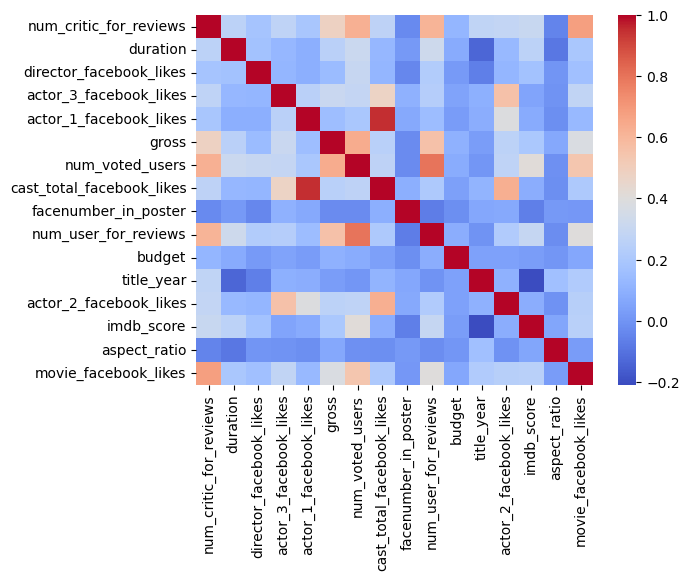

In [107]:
# Plottting a heatmap to show the correlation
sns.heatmap(imdb.corr(),cmap = 'coolwarm')

From the plot above, we can see that we there is no  strong correlation  between the budget and the gross, and the gross and the  imdb_score.

In [108]:
# I would be dropping some columns which would not be used in the analysis and renaming the new dataset as df.
df=imdb.drop((['color','director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes',
               'facenumber_in_poster','plot_keywords','movie_imdb_link','content_rating','language',
               'actor_2_facebook_likes','aspect_ratio','movie_facebook_likes']),axis=1)

In [64]:
# To check for the remaining columns after dropping
df.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,country,budget,title_year,imdb_score
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,3054.0,USA,237000000.0,2009.0,7.9
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,1238.0,USA,300000000.0,2007.0,7.1
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,994.0,UK,245000000.0,2015.0,6.8
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,2701.0,USA,250000000.0,2012.0,8.5
4,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,NaN,NaN,NaN,7.1


In [109]:
# To  check for the number of columns left after droppping
df.shape

(5043, 16)

In [110]:
# To rearrange the columns for easy traceability
df1=df.reindex(columns=['movie_title','title_year','country','director_name','actor_1_name',
                        'actor_2_name','actor_3_name','duration','genres','budget','gross','imdb_score',
                        'cast_total_facebook_likes','num_critic_for_reviews','num_voted_users','num_user_for_reviews'])

In [111]:
df1.head()

,movie_title,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name,duration,genres,budget,gross,imdb_score,cast_total_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews
0,Avatar,2009.0,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,178.0,Action|Adventure|Fantasy|Sci-Fi,237000000.0,760505847.0,7.9,4834,723.0,886204,3054.0
1,Pirates of the Caribbean: At World's End,2007.0,USA,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,169.0,Action|Adventure|Fantasy,300000000.0,309404152.0,7.1,48350,302.0,471220,1238.0
2,Spectre,2015.0,UK,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,148.0,Action|Adventure|Thriller,245000000.0,200074175.0,6.8,11700,602.0,275868,994.0
3,The Dark Knight Rises,2012.0,USA,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,164.0,Action|Thriller,250000000.0,448130642.0,8.5,106759,813.0,1144337,2701.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,Documentary,NaN,NaN,7.1,143,NaN,8,NaN


In [112]:
# Replace the 0 with NaN
df1.replace(0,np.nan, inplace=True)

In [113]:
# To check for the number of NaN values in each column
df1.isnull().sum()

movie_title                    0
title_year                   108
country                        5
director_name                104
actor_1_name                   7
actor_2_name                  13
actor_3_name                  23
duration                      15
genres                         0
budget                       492
gross                        884
imdb_score                     0
cast_total_facebook_likes     33
num_critic_for_reviews        50
num_voted_users                0
num_user_for_reviews          21
dtype: int64

From the data, we can see that we have some NaN values in our columns. To help in increasing the accurracy of this analysis,I would be dropping all the NaN in the data.

In [114]:
# To drop the NaN values in the dataset
df2=df1.dropna()

I checked for duplicates in the data set and also dropped all the duplicates in the data.

In [115]:
# To check for duplicates in the dataset
duplicate=df2.duplicated().any()
duplicate

True

The result above shows that we have duplicates available in our dataset. I would be dropping the duplicate to improve the accuracy of our data for the analysis.

In [116]:
# To drop the duplicates in the data
df3=df2.drop_duplicates()

In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3839 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                3839 non-null   object 
 1   title_year                 3839 non-null   float64
 2   country                    3839 non-null   object 
 3   director_name              3839 non-null   object 
 4   actor_1_name               3839 non-null   object 
 5   actor_2_name               3839 non-null   object 
 6   actor_3_name               3839 non-null   object 
 7   duration                   3839 non-null   float64
 8   genres                     3839 non-null   object 
 9   budget                     3839 non-null   float64
 10  gross                      3839 non-null   float64
 11  imdb_score                 3839 non-null   float64
 12  cast_total_facebook_likes  3839 non-null   float64
 13  num_critic_for_reviews     3839 non-null   float

In [118]:
# To check for the percentage of the data left after cleaning the dataset
print((len(df3.index)/5042)*100)

print(df3.shape)

76.14042046806823
(3839, 16)


After cleaning our data, the result above shows that we still have 76% of our data left which is still statistically okay to carryout the analysis.

I would be creating a new columns called "profit" to show how  much profit was made from each movie.This would be gotten by getting the difference between the gross and the budget. The profit column would be added to the dataset as a new column.

### Creating a new column called "Profit"

In [119]:
# To create a new column called profit (which is the difference between the budget and the gross)
df3['profit'] =df3['gross'] - df3['budget']

In [76]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3839 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                3839 non-null   object 
 1   title_year                 3839 non-null   float64
 2   country                    3839 non-null   object 
 3   director_name              3839 non-null   object 
 4   actor_1_name               3839 non-null   object 
 5   actor_2_name               3839 non-null   object 
 6   actor_3_name               3839 non-null   object 
 7   duration                   3839 non-null   float64
 8   genres                     3839 non-null   object 
 9   budget                     3839 non-null   float64
 10  gross                      3839 non-null   float64
 11  imdb_score                 3839 non-null   float64
 12  cast_total_facebook_likes  3839 non-null   float64
 13  num_critic_for_reviews     3839 non-null   float

## Data Splitting

I would be splitting my dataset into two. One half would be for carrying out my Exploratory Data Analysis(EDA) and the other half would be to carry out my Hypothesis Testing.

In [120]:
df3_eda=df3.sample(frac=0.5, random_state=1)
df3_test=df3.drop(df3_eda.index)

# Exploratory Data Analysis (EDA)

To carryout the exploratory data analysis, Firstly, I would be checking for the correlation between the variables to see if there are any correlations between certain variable for the analysis.

In [121]:
# To check  for the correlation of the data I would be using for EDA
df3_eda.corr()

,title_year,duration,budget,gross,imdb_score,cast_total_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews,profit
title_year,1.000000,-0.138636,0.031358,0.033219,-0.140458,0.141357,0.383560,-0.012763,-0.003364,-0.023390
duration,-0.138636,1.000000,0.053382,0.262002,0.377756,0.195708,0.235763,0.371817,0.349824,0.007263
budget,0.031358,0.053382,1.000000,0.066165,0.031980,0.024214,0.094428,0.049186,0.051498,-0.973508
gross,0.033219,0.262002,0.066165,1.000000,0.218535,0.320460,0.464157,0.612883,0.549342,0.163741
imdb_score,-0.140458,0.377756,0.031980,0.218535,1.000000,0.140634,0.345591,0.477987,0.330597,0.018461
cast_total_facebook_likes,0.141357,0.195708,0.024214,0.320460,0.140634,1.000000,0.317076,0.328410,0.250744,0.049496
num_critic_for_reviews,0.383560,0.235763,0.094428,0.464157,0.345591,0.317076,1.000000,0.569124,0.547455,0.013006
num_voted_users,-0.012763,0.371817,0.049186,0.612883,0.477987,0.328410,0.569124,1.000000,0.796509,0.091818
num_user_for_reviews,-0.003364,0.349824,0.051498,0.549342,0.330597,0.250744,0.547455,0.796509,1.000000,0.074971
profit,-0.023390,0.007263,-0.973508,0.163741,0.018461,0.049496,0.013006,0.091818,0.074971,1.000000


<AxesSubplot:>

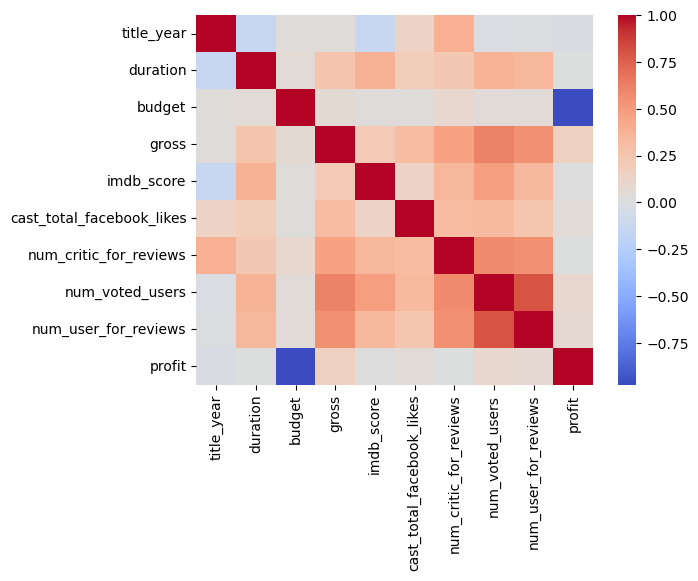

In [122]:
# Using a plot to show the visualization 
sns.heatmap(df3_eda.corr(),cmap = 'coolwarm')

From  the plot above, I can see a correlation between the imdb_score and the duration and the gross and number of voted users. I would  be  using scattered plots to visualize the relationship.

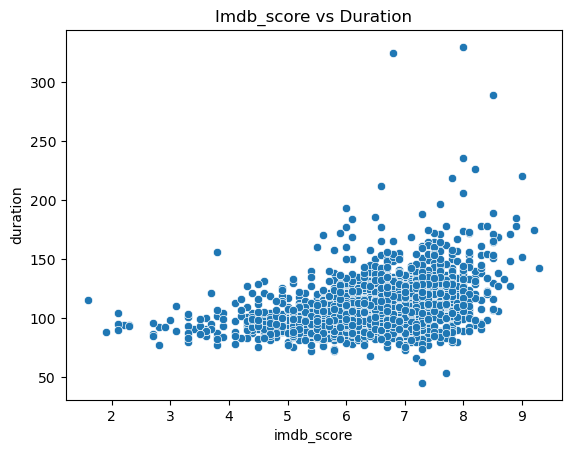

In [123]:
# Plotting a scattered plot to show the relationship the imdb_score and the duration.
s1=sns.scatterplot(x='imdb_score',y='duration',data=df3_eda).set(title='Imdb_score vs Duration')

In [124]:
df3_eda['imdb_score'].mean()

6.454531250000005

From the plot above, it shows that most movies that scored above our average imdb_score had their duration  between 60  to 120 minutes.

I would be ploting a joint plot (scattered plot and histogram) to check for the correlation between the gross and the number of voted users.

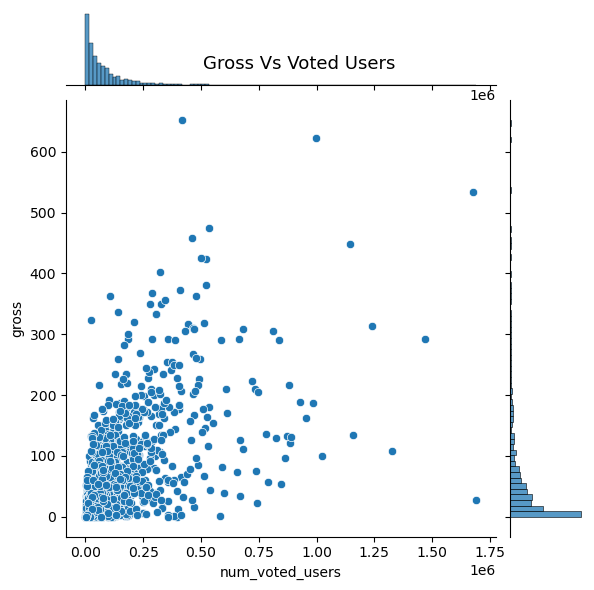

In [157]:
# Plot showing the relationship between the gross and num_voted_users
a=sns.jointplot(data=df3_eda,x="num_voted_users",y="gross")
#plt.title("Gross Vs Voted Users")
a.fig.suptitle("Gross Vs Voted Users",size=13,y=0.9)

plt.show()

From the plot above, it shows that movies with low gross had a low number of voted users reviews. This means that the users voted review we have the higher the gross that would be generated

### Converting our Budget, Gross and Profit to Millions

I would be dividing the budget, gross and  profit by 1000000 to convert the values to millions 

In [127]:
# Divide the 'gross', 'budget' and 'profit' columns by 1000000 to convert the values to millions
df3_eda['gross'] = df3_eda['gross']/1000000
df3_eda['budget'] = df3_eda['budget']/1000000
df3_eda['profit'] = df3_eda['profit']/1000000
df3_eda.head()

,movie_title,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name,duration,genres,budget,gross,imdb_score,cast_total_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews,profit
2066,Jaws: The Revenge,1987.0,USA,Joseph Sargent,Judith Barsi,Mario Van Peebles,Lynn Whitfield,92.0,Adventure|Horror|Thriller,23.0,20.763013,2.8,2355.0,80.0,30840,383.0,-2.236987
3160,Get Over It,2001.0,USA,Tommy O'Haver,Mila Kunis,Kirsten Dunst,Carmen Electra,87.0,Comedy|Romance,22.0,11.560259,5.8,22485.0,63.0,15617,180.0,-10.439741
1057,Dick Tracy,1990.0,USA,Warren Beatty,Charlie Korsmo,Warren Beatty,Seymour Cassel,105.0,Action|Comedy|Crime|Music|Romance|Thriller,100.0,103.738726,6.1,2096.0,72.0,47819,164.0,3.738726
1821,Case 39,2009.0,USA,Christian Alvart,Bradley Cooper,Callum Rennie,Vanesa Tomasino,109.0,Horror|Mystery|Thriller,27.0,13.248477,6.2,15790.0,167.0,60555,174.0,-13.751523
3798,Redacted,2007.0,USA,Brian De Palma,Mike Figueroa,Daniel Stewart Sherman,Kel O'Neill,90.0,Crime|Thriller|War,5.0,0.065087,6.2,408.0,133.0,8824,108.0,-4.934913


Recall  that we  were given a budget of 1500000 for the movie production. Therefore, I would be checking for the movies that had less than or equal to our budget and then checking for the most profitable genre. 

In [135]:
# Filtering our data by the maximum budget of 1500000
max_budget = 1.5
movies_budget=df3_eda[(df3_eda.budget <= max_budget)]
movies_budget.head()
movies_budget.shape

(126, 17)

In [136]:
# Grouping the different genres by their average profit
profitgroup=movies_budget.groupby('genres')[['profit']].mean()
profitgroup

,profit
genres,
Action|Biography|Drama|Sport,10.706119
Action|Comedy|Fantasy|Sci-Fi,-0.987004
Action|Crime|Drama,-0.428012
Action|Crime|Drama|Romance|Thriller,2.033920
Action|Drama,-0.903266
...,...
Horror|Mystery|Thriller,26.526791
Horror|Sci-Fi,16.500000
Horror|Thriller,30.775468


In [137]:
# Checking for top 10 genres with the highest profit
top10_profit_genres=profitgroup.nlargest(10,'profit')
top10_profit_genres

,profit
genres,
Fantasy|Horror|Mystery|Thriller,52.491137
Horror|Thriller,30.775468
Horror,26.539207
Horror|Mystery|Thriller,26.526791
Horror|Sci-Fi,16.500000
Biography|Drama|Romance,15.197842
Action|Biography|Drama|Sport,10.706119
Drama|Horror|Mystery|Thriller,9.042266
Comedy|Drama|Music,8.100000


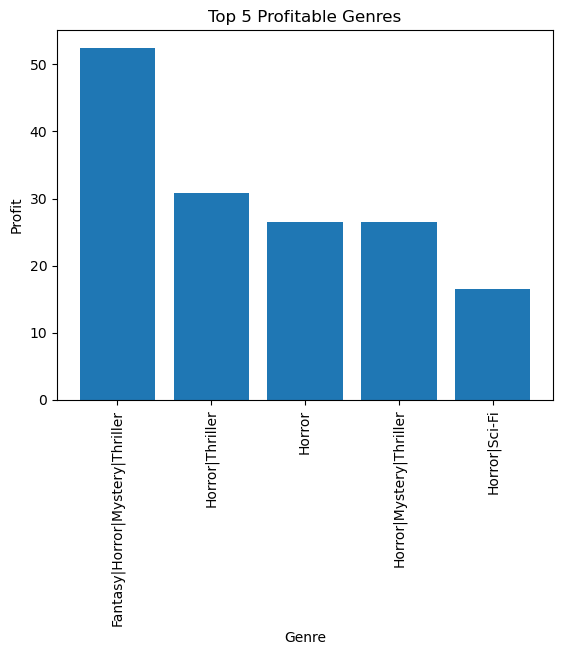

In [138]:
from matplotlib.pyplot import figure
plt.bar(top10_profit_genres.index[:5] , top10_profit_genres['profit'][:5]) # To show the profit of top 5 genres within the budget limit
plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Profit')
plt.title('Top 5 Profitable Genres')
plt.show()

# Hypothesis Testing

In this section, I would be carrying out the hypothesis testing using the second half of the data i.e df3_test.

Hypothesis Statement: If there is a relationship between genre and profit, then producing a movie in the "Horror" genre will generate a higher profit.


Independent Variable= Genre(Horror),


Dependent Variable= Profit

A confidence Interval would be determined to find the range of the obtainable profit

Let the predetermined significance level be 0.05%

In [140]:
df3_test['gross'] = df3_test['gross']/1000000
df3_test['budget'] = df3_test['budget']/1000000
df3_test['profit'] = df3_test['profit']/1000000
df3_test.head()

,movie_title,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name,duration,genres,budget,gross,imdb_score,cast_total_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews,profit
0,Avatar,2009.0,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,178.0,Action|Adventure|Fantasy|Sci-Fi,237.0,760.505847,7.9,4834.0,723.0,886204,3054.0,523.505847
2,Spectre,2015.0,UK,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,148.0,Action|Adventure|Thriller,245.0,200.074175,6.8,11700.0,602.0,275868,994.0,-44.925825
6,Spider-Man 3,2007.0,USA,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,156.0,Action|Adventure|Romance,258.0,336.530303,6.2,46055.0,392.0,383056,1902.0,78.530303
9,Harry Potter and the Half-Blood Prince,2009.0,UK,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,153.0,Adventure|Family|Fantasy|Mystery,250.0,301.956980,7.5,58753.0,375.0,321795,973.0,51.956980
10,Batman v Superman: Dawn of Justice,2016.0,USA,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin,183.0,Action|Adventure|Sci-Fi,250.0,330.249062,6.9,24450.0,673.0,371639,3018.0,80.249062


In [141]:
best_genre=df3_test[(df3_test['genres'].str.contains('Horror',case=False,na=False)) & (df3_test.budget<1.5)]
best_genre.profit.mean()

26.840580263157893

Using scipy, a Confidence Interval of 95% would be used for the calculation.

In [142]:
# To find our sample size
len(best_genre.profit)

19

Since the sample size is less than 30, we would be a t-test

In [158]:
# To find the confidence interval range
import scipy.stats as st
(a,b)=st.t.interval(alpha=0.95, df=len(best_genre.profit)-1,loc=np.mean(best_genre.profit), scale=st.sem(best_genre.profit))
print("The confidence interval is between", a, "and ", b)

The confidence interval is between 10.772626445854556 and  42.90853408046123


From the above, we can say that "We are 95% confident that the mean Profit for a movie produced with a budget less than £1.5m would be between £10.77m and £42.91m.

For this hypothesis, we would be using statistical significance and Mean Testing for the test.

Assuming we want to know if the mean Profits from Horror Movies with a maximum budget of £1.5M would be significantly greater than £10.77M (i.e the minimum value from confidence interval above)

A classical hypothesis test would be represented thus:

Null Hypothesis, H0:µ=10.77m

Alternate Hypothesis, H1:µ>10.77m

Note: For this test, a statistical significance level of 0.05 would be set

In [151]:
# I would be using a t-test to get the z-value

null_mean=10.77
sample_mean=best_genre.profit.mean()
sample_SD=best_genre.profit.std()
size=len(best_genre.profit)

z_value=(sample_mean-null_mean)/(sample_SD/(size-1)**0.5)
z_value

2.0452216088198125

From the Z-Value, we can now calculate our P-Value

In [152]:
# To get the P-value
from scipy import stats
p_value=1-stats.t.cdf(z_value,size)
p_value

0.027467323233185126

Using the P-Value of approximately 0.027 which is less than the predetermined significance level of 0.05, it shows there is a strong evidence against the null hypothesis. Therefore, the alternative hypothesis would be accepted and the null hypothesis would be rejected. This means that Movies in the Horror genre with a budget of 1.5million GBP wil make a profit greater than 10.77 million GBP.

# Summary

In this report, I carried out an analysis on the Imdb movie dataset to suggest the best movie to produce for Sussex Budget Productions considering a maximum budget of 1.5M which would yield the highest profit.

To carryout this analysis, I started with the data cleaning and created a new column called "Profit" which was gotten from    the difference between the gross and the budget. I proceeded further to split the dataset into two in which the first half used to carryout the Exploratory Data Analysis and the other half was for the Hypotheis Testing.

For the Exploratory Data Analysis (EDA), I plotted a corrrelation graph to see the relationships between the variables and it showed a high correlation between the imdb movie scores and movie duration and also between the gross and the number of user reviews. The plot of Imdb score against the duration showed that most movies within within our average imdb score of 6.4 had their movie durrration  between 100 to 150 minutes. Also, the plot of the gross against the user reviews indicated that most movies with low gross had low reviews which means that the gross was influenced by the reviews on the movies. I proceeded further to filter the data to get the top profitable movie genres produced with a budget less than or equals to 1.5million and it gave me the top 5 with horror being the most common genre theme.

Further more, the Hypothesis Testing was carried out using the other half of our dataset. The result gotten from the EDA which showed that horror movie genres would be the most profitable was used as the basis of our testing. A t-test was carried out based on the sample size of 19 and the P-value that was gotten supported the alternative hypothesis which means that producing a horror movie genre would be more profitable.

In conclusion, I would recommend producing a movie in the Horror movie genre. However, it would be good to make the movie duration between 60 to 120 minutes. Also, i would suggest promoting the movie rigorously in order to gain tractions and a  lot of reviews which would in turn attract a lot of viewers and increase the gross and most likely the profit.